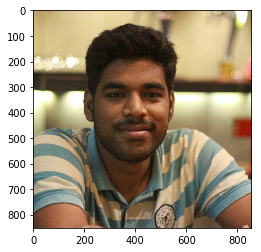

In [12]:
# Import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Load the image
data = plt.imread('karthick.png')

# Display the image
plt.imshow(data)
plt.show()

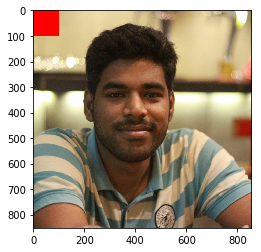

In [5]:
# Set the red channel in this part of the image to 1
data[:100, :100, 0] = 1

# Set the green channel in this part of the image to 0
data[:100, :100, 1] = 0

# Set the blue channel in this part of the image to 0
data[:100, :100, 2] = 0

# Visualize the result
plt.imshow(data)
plt.show()

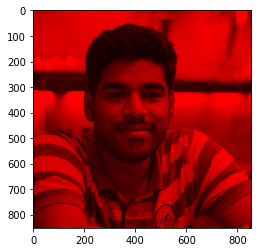

In [13]:
# Set the green channel in this part of the image to 0
data[:, :, 1] = 0

# Set the blue channel in this part of the image to 0
data[:, :, 2] = 0

# Visualize the result
plt.imshow(data)
plt.show()

##### Setting up the validation strategy

In [14]:
# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

In [16]:
# Calculate the number of correct predictions

test_labels = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

predictions = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

number_correct = (test_labels*predictions).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(proportion_correct)

6.0
0.75


In [75]:
# Input data

data =np.load('fashion.npz')
type(data)

numpy.lib.npyio.NpzFile

In [84]:
data = data.f.arr_0.tolist()

In [88]:
type(data)

dict

In [99]:
data.keys()    

dict_keys(['train_data', 'train_labels', 'test_data', 'test_labels'])

In [110]:
train_data = data['train_data']
train_labels = data['train_labels']
test_data = data['test_data']
test_labels = data['test_labels']

In [102]:
train_data.shape #very small

(50, 28, 28, 1)

In [103]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

Using TensorFlow backend.


In [104]:
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

In [105]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape(50, 784)

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=10)

Train on 40 samples, validate on 10 samples
Epoch 1/10
40/40 [==============================] - 21s 514ms/step - loss: 0.9910 - acc: 0.6000 - val_loss: 1.0133 - val_acc: 0.3000
Epoch 2/10
40/40 [==============================] - 0s 523us/step - loss: 0.8745 - acc: 0.6000 - val_loss: 0.9831 - val_acc: 0.3000
Epoch 3/10
40/40 [==============================] - 0s 648us/step - loss: 0.8128 - acc: 0.6000 - val_loss: 0.9462 - val_acc: 0.3000
Epoch 4/10
40/40 [==============================] - 0s 673us/step - loss: 0.7572 - acc: 0.6250 - val_loss: 0.8857 - val_acc: 0.4000
Epoch 5/10
40/40 [==============================] - 0s 586us/step - loss: 0.6960 - acc: 0.6250 - val_loss: 0.8338 - val_acc: 0.5000
Epoch 6/10
40/40 [==============================] - 0s 549us/step - loss: 0.6421 - acc: 0.6750 - val_loss: 0.7831 - val_acc: 0.8000
Epoch 7/10
40/40 [==============================] - 0s 848us/step - loss: 0.5925 - acc: 0.8000 - val_loss: 0.7297 - val_acc: 1.0000
Epoch 8/10
40/40 [=============

In [111]:
# Reshape test data
test_data = test_data.reshape(test_data.shape[0], 784)

# Evaluate the model
model.evaluate(test_data,test_labels)

10/10 [==============================] - 0s 698us/step


[0.4513649344444275, 0.800000011920929]

In [116]:
print("First prediction on the test case .. ",model.predict(test_data[[0][:]]))
#third case

First prediction on the test case ..  [[0.11421752 0.13917753 0.7466049 ]]


In [118]:
from keras.models import Sequential
from keras.layers import Conv2D

In [ ]:
model =Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 strides=2))

In [120]:
train_data.shape

(50, 28, 28, 1)